## News Headlines Sentiment

* Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. Use descriptive statistics to answer the following questions:

* Which coin had the highest mean positive score?
* Which coin had the highest negative score?
* Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [3]:
# Read your api key environment variable
api_key = os.getenv("api_key")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = api_key)

In [5]:
# Fetch the Bitcoin news articles
btc = newsapi.get_everything(q='bitcoin', language='en')
btc['totalResults']

3567

In [6]:
# Fetch the Ethereum news articles
eth = newsapi.get_everything(q='ethereum', language='en')
eth['totalResults']

1389

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sent = []

for article in btc["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sent.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sent)

cols = ["compound", "negative", "neutral", "positive", "text"]
btc_df = btc_df[cols]

btc_df.head()

,compound,negative,neutral,positive,text
0,-0.6908,0.160,0.840,0.000,Two alleged crypto traders in Singapore appare...
1,0.2500,0.000,0.935,0.065,Image copyrightChandler GuoImage caption\r\n C...
2,0.0000,0.000,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ..."
3,-0.5267,0.128,0.872,0.000,A US district judge has sentenced a UK Nationa...
4,0.0000,0.000,1.000,0.000,"July 15 was, at first, just another day for Pa..."


In [8]:
# Create the ethereum sentiment scores DataFrame
eth_sent = []

for article in eth["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sent.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sent)

cols = ["compound", "negative", "neutral", "positive", "text"]
eth_df = eth_df[cols]

eth_df.head()

,compound,negative,neutral,positive,text
0,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...
2,0.0000,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."
3,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
4,0.4019,0.0,0.924,0.076,TLDR: With the training in the Interactive Lea...


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.293355,0.014400,0.918450,0.067150
std,0.380025,0.044625,0.051096,0.051527
min,-0.690800,0.000000,0.802000,0.000000
25%,0.000000,0.000000,0.910000,0.000000
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.916250,0.090000
max,0.750600,0.160000,1.000000,0.198000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,negative,neutral,positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.263678,0.014722,0.908722,0.076556
std,0.285033,0.031212,0.088669,0.074676
min,0.000000,0.000000,0.747000,0.000000
25%,0.000000,0.000000,0.824500,0.000000
50%,0.226300,0.000000,0.917000,0.073000
75%,0.480725,0.000000,1.000000,0.134750
max,0.757900,0.110000,1.000000,0.209000


Questions:
* Q: Which coin had the highest mean positive score?
* A: BTC had the highest mean positive score
    
* Q: Which coin had the highest compound score?
* A: BTC had the highest compound score
    
* Q. Which coin had the highest positive score?
* A: ETH had the highest positive score

### Tokenizer

* In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
* Lowercase each word
* Remove Punctuation
* Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
btc_txt = btc_df['text']
lemmatizer = WordNetLemmatizer()

def tokenizer(btc_txt):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', btc_txt)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [15]:
btc_tkn = btc_df.text.apply(tokenizer)
btc_df['tokens'] = btc_tkn
btc_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.6908,0.160,0.840,0.000,Two alleged crypto traders in Singapore appare...,"[two, alleged, crypto, trader, singapore, appa..."
1,0.2500,0.000,0.935,0.065,Image copyrightChandler GuoImage caption\r\n C...,"[image, copyrightchandler, guoimage, caption, ..."
2,0.0000,0.000,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[alexis, akwagyiram, tom, wilson, monthly, cry..."
3,-0.5267,0.128,0.872,0.000,A US district judge has sentenced a UK Nationa...,"[us, district, judge, ha, sentenced, uk, natio..."
4,0.0000,0.000,1.000,0.000,"July 15 was, at first, just another day for Pa...","[july, wa, first, another, day, parag, agrawal..."


In [16]:
# Create a new tokens column for ethereum
eth_txt = eth_df['text']
lemmatizer = WordNetLemmatizer()

def tokenizer(eth_txt):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', eth_txt)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [18]:
eth_tkn = eth_df.text.apply(tokenizer)
eth_df['tokens'] = eth_tkn
eth_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...,"[youve, interacted, cryptocurrencies, past, co..."
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...,"[tldr, complete, stock, cryptocurrency, invest..."
2,0.0000,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[september, min, readopinions, expressed, entr..."
3,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,"[london, reuters, sound, like, surefire, bet, ..."
4,0.4019,0.0,0.924,0.076,TLDR: With the training in the Interactive Lea...,"[tldr, training, interactive, learn, code, bun..."


### NGrams and Frequency Analysis

* In this section you will look at the ngrams and word frequency for each coin. 
* Use NLTK to produce the n-grams for N = 2. 
* List the top 10 words for each coin.

In [19]:
from collections import Counter
from nltk import ngrams
lemmatizer = WordNetLemmatizer()

In [20]:
def process_text(btc_txt):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]  # sw must be a set for union to work correctly

    return output

In [21]:
# Generate the Bitcoin N-grams where N=2
btc_processed = tokenizer(btc_txt.str.cat())
bigram_counts = Counter(ngrams(btc_processed, n=2))
bigram_counts.most_common(10)

[(('satoshi', 'nakaboto'), 24),
 (('charsour', 'robot'), 12),
 (('robot', 'colleague'), 12),
 (('colleague', 'satoshi'), 12),
 (('nakaboto', 'writes'), 12),
 (('writes', 'bitcoin'), 12),
 (('every', 'fucking'), 12),
 (('fucking', 'daywelcome'), 12),
 (('daywelcome', 'another'), 12),
 (('another', 'edition'), 12)]

In [22]:
# Generate the Ethereum N-grams where N=2
eth_processed = tokenizer(eth_txt.str.cat())
bigram_count = Counter(ngrams(eth_processed, n=2))
bigram_count.most_common(10)

[(('coronavirus', 'pandemic'), 2),
 (('one', 'cryptocurrency'), 2),
 (('fiat', 'backed'), 2),
 (('backed', 'stablecoins'), 2),
 (('satoshi', 'nakaboto'), 2),
 (('decentralized', 'exchange'), 2),
 (('photo', 'illustration'), 2),
 (('imageslightrocket', 'via'), 2),
 (('via', 'getty'), 2),
 (('price', 'bitcoin'), 2)]

In [68]:
# Get the top 10 words for Bitcoin
btc_count = Counter(btc_processed).most_common(10)
btc_count

[('bitcoin', 37),
 ('satoshi', 24),
 ('nakaboto', 24),
 ('another', 13),
 ('charsour', 12),
 ('robot', 12),
 ('colleague', 12),
 ('writes', 12),
 ('every', 12),
 ('fucking', 12)]

In [69]:
# Get the top 10 words for Ethereum
eth_count = Counter(eth_processed).most_common(10)
eth_count

[('cryptocurrency', 8),
 ('bitcoin', 7),
 ('ethereum', 6),
 ('used', 4),
 ('wa', 3),
 ('price', 3),
 ('decentralized', 3),
 ('exchange', 3),
 ('getty', 3),
 ('youve', 2)]

### Word Clouds

* In this section, you will generate word clouds for each coin to summarize the news for each coin

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [89]:
def process(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

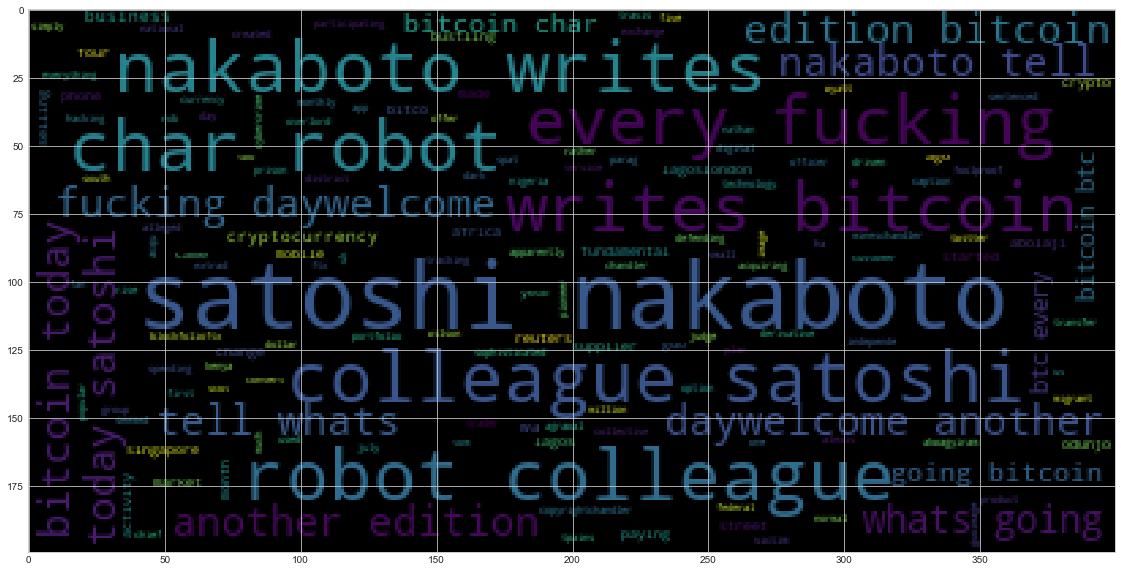

In [92]:
# Generate the Bitcoin word cloud
big_string = ' '.join(btc_txt)
b_inputs = process(big_string)
wc = WordCloud().generate(b_inputs)
plt.imshow(wc)

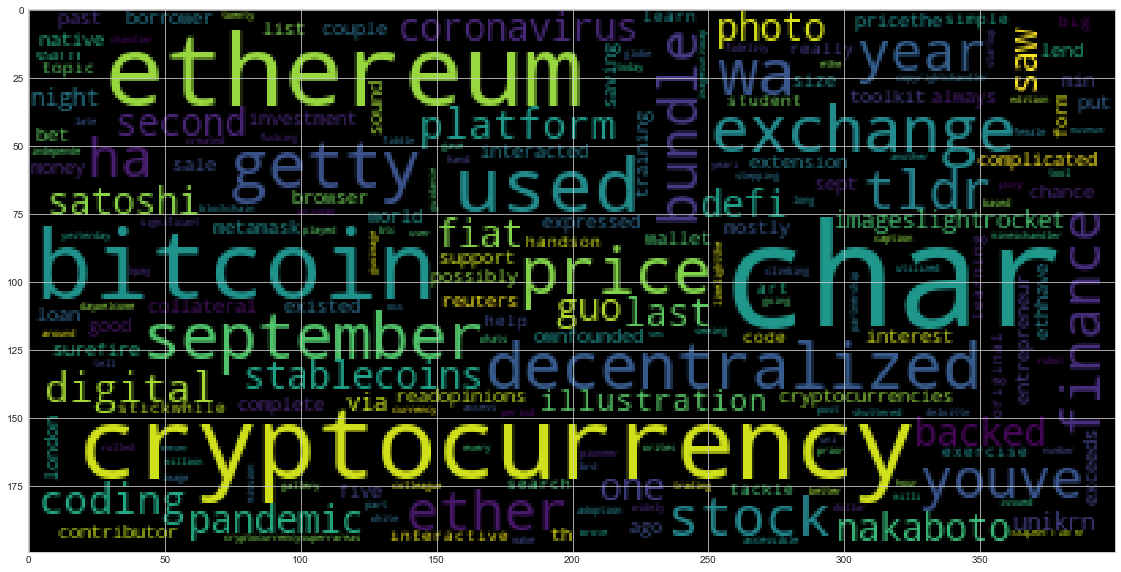

In [93]:
# Generate the Ethereum word cloud
big_strings = ' '.join(eth_txt)
e_inputs = process(big_strings)
wcs = WordCloud().generate(e_inputs)
plt.imshow(wcs)

### Named Entity Recognition

* In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [94]:
import spacy
from spacy import displacy

In [96]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

### Bitcoin NER

In [118]:
# Concatenate all of the bitcoin text together
btc_cat = btc_txt.str.cat()

# Run the NER processor on all of the text
doc = nlp(btc_cat)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

# Render the visualization
displacy.render(doc, style='ent')

In [106]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Two CARDINAL
Singapore GPE
365,000 Singapore dollars MONEY
bitcoin GPE
GuoImage ORG
Chandler Guo PERSON
one CARDINAL
Chandler Guo PERSON
Alexis Akwagyiram PERSON
Tom Wilson PERSON
Monthly DATE
Africa LOC
55% PERCENT
a year DATE
Nigeria GPE
South Africa GPE
Kenya GPE
US GPE
UK National ORG
five years DATE
The Dark Overlord WORK_OF_ART
Nathan Wyatt PERSON
chars]July 15 CARDINAL
first ORDINAL
Parag Agrawal ORG
Twitter ORG
Travis Scot PERSON
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE

### Ethereum NER

In [121]:
# Concatenate all of the bitcoin text together
eth_cat = eth_txt.str.cat()

# Run the NER processor on all of the text
docs = nlp(eth_cat)

# Add a title to the document
docs.user_data["title"] = "Ethereum NER"

# Render the visualization
displacy.render(docs, style='ent')

In [109]:
# List all Entities
for ent in docs.ents:
    print(ent.text, ent.label_)

the past couple of years DATE
The Complete Stock and Cryptocurrency Investment Toolkit Bundle ORG
29.46 MONEY
Sept. 7 DATE
97% PERCENT
18, 2020 DATE
6 min QUANTITY
five years ago DATE
Ethereum ORG
ETH ORG
Reuters ORG
about 20% PERCENT
SuperRare ORG
SuperRare ORG
GuoImage ORG
Chandler Guo PERSON
one CARDINAL
Chandler Guo PERSON
SEC ORG
OCC ORG
fiat ORG
yesterday DATE
fiat ORG
this year DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
second ORDINAL
one CARDINAL
bitcoin GPE
more than 10% PERCENT
24-hour TIME
chars]$100 million MONEY
Deloitte ORG
KPMG ORG
Fidelity ORG
$100 milli MONEY
Uniswap ORG
400 CARDINAL
UNI ORG
September 1 DATE
twenty dollars MONEY
May DATE
bitcoin GPE
DeFi LOC
DeFi LOC
Ethereum ORG
Mateusz Slodkowski/ PERSON
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
September 15, 2020 DATE
the night TIME
USD ORG
the night TIME
Unikrn ORG
Unikrn ORG
UnikoinGold ORG
second ORDINAL
last spring DATE
